## 3.1 Korrelation in Signalen


In [1]:
import cv2 as cv
from enum import Enum
from ipywidgets import interact, widgets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import morphology
from scipy import signal
from scipy import datasets
import statsmodels.api as sm

C:\Program Files\Python311\Lib\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
weather = pd.read_csv('Extended_Weather_Past_Data_with_Seasonal_Variation.csv', sep=',', decimal='.')

weather['Datum'] = pd.to_datetime(weather['Datum'], yearfirst=True)
weather.head()

Unnamed: 0      Datum Wochentag  Tagestemperatur  Nachttemperatur
0           0 2019-05-02  Thursday               21               10
1           1 2019-05-03    Friday               23               14
2           2 2019-05-04  Saturday               25               12
3           3 2019-05-05    Sunday               20               14
4           4 2019-05-06    Monday               24               13

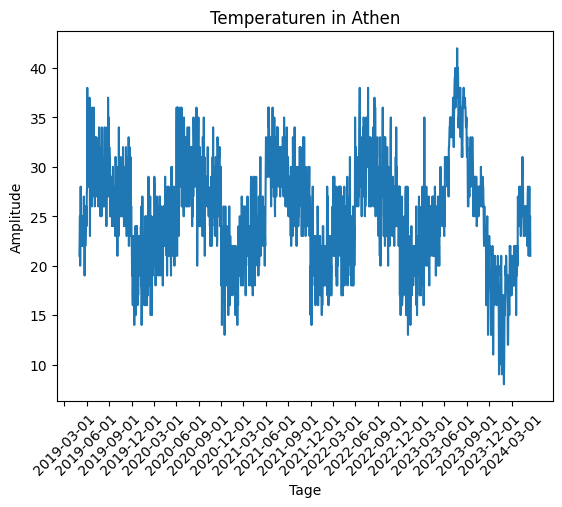

In [3]:
plt.plot(weather['Datum'], weather['Tagestemperatur'])
plt.title('Temperaturen in Athen')
plt.xlabel('Tage')
plt.ylabel('Amplitude')

selected_dates = pd.to_datetime(['2019-03-01', '2019-06-01', '2019-09-01', '2019-12-01', '2020-03-01', '2020-06-01', '2020-09-01', '2020-12-01', '2021-03-01', '2021-06-01', '2021-09-01', '2021-12-01', '2022-03-01', '2022-06-01', '2022-09-01', '2022-12-01', '2023-03-01', '2023-06-01', '2023-09-01', '2023-12-01', '2024-03-01'])
plt.xticks(selected_dates, selected_dates.strftime('%Y-%m-%d'), rotation=45)

plt.show()

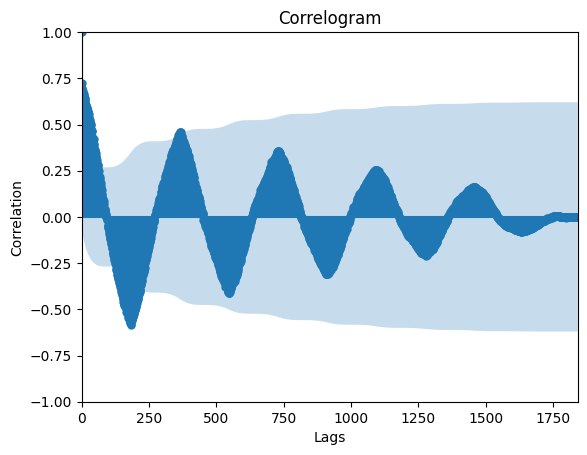

In [4]:
lags = len(weather) -1

sm.graphics.tsa.plot_acf(weather["Tagestemperatur"], lags=lags, title="Correlogram")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.xlim(0, lags)
plt.show()

Hohe Anfangskorrelation:

Am Lag 0 ist die Autokorrelation immer 1, da ein Wert mit sich selbst perfekt korreliert ist.
Die Autokorrelation bleibt bei den ersten Lags hoch (zwischen 0 und 50), was darauf hindeutet, dass aufeinanderfolgende Tage ähnliche Temperaturen haben. Dies ist typisch für Temperaturdaten, da das Wetter an aufeinanderfolgenden Tagen oft ähnlich ist.

Abnehmende Korrelation:
Die Autokorrelation nimmt mit zunehmendem Lag kontinuierlich ab. Dies bedeutet, dass der Zusammenhang zwischen den Temperaturen mit der Zeit schwächer wird.

Negative Korrelation:
Zwischen Lag 50 und Lag 150 zeigt die Autokorrelation negative Werte, was auf eine mögliche saisonale Komponente hinweist. In diesem Fall könnte es bedeuten, dass die Temperaturen nach etwa 50 Tagen entgegengesetzt korreliert sind, was auf eine jährliche saisonale Schwankung hinweisen könnte.

Rückkehr zu Null:
Ab etwa Lag 150 beginnen die Autokorrelationen wieder zu steigen und nähern sich Null an. Dies deutet darauf hin, dass die Temperaturwerte über längere Zeiträume hinweg keine starke Korrelation mehr aufweisen.

Saisonale Muster:
Die deutliche negative Korrelation und das Muster der Rückkehr zu Null deuten auf eine saisonale Komponente hin. Bei Wetterdaten ist dies oft durch Jahreszeiten bedingt, was bedeutet, dass ähnliche Temperaturniveaus nach einem Jahr wiederkehren könnten.

### Kreuzkorrelation von Temperaturdaten

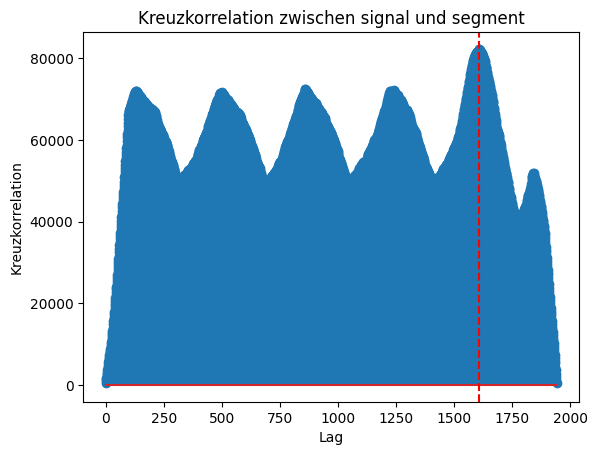

Der beste Lag ist: 1509


In [5]:
x_daten = weather["Tagestemperatur"]
y_daten = weather["Tagestemperatur"][1600:1700]

cross_corr = np.correlate(x_daten, y_daten, mode='full')

lags = np.arange(-len(y_daten) + 1, len(x_daten))

# Plotten der Kreuzkorrelation
plt.stem(cross_corr)
plt.xlabel('Lag')
plt.ylabel('Kreuzkorrelation')
plt.title('Kreuzkorrelation zwischen signal und segment')
plt.axvline(np.argmax(cross_corr), color='r', linestyle='--')
plt.show()

# Den Lag mit der höchsten Kreuzkorrelation finden
max_corr_index = np.argmax(cross_corr)
best_lag = lags[max_corr_index]
print("Der beste Lag ist:", best_lag)

### Rolling Mean

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


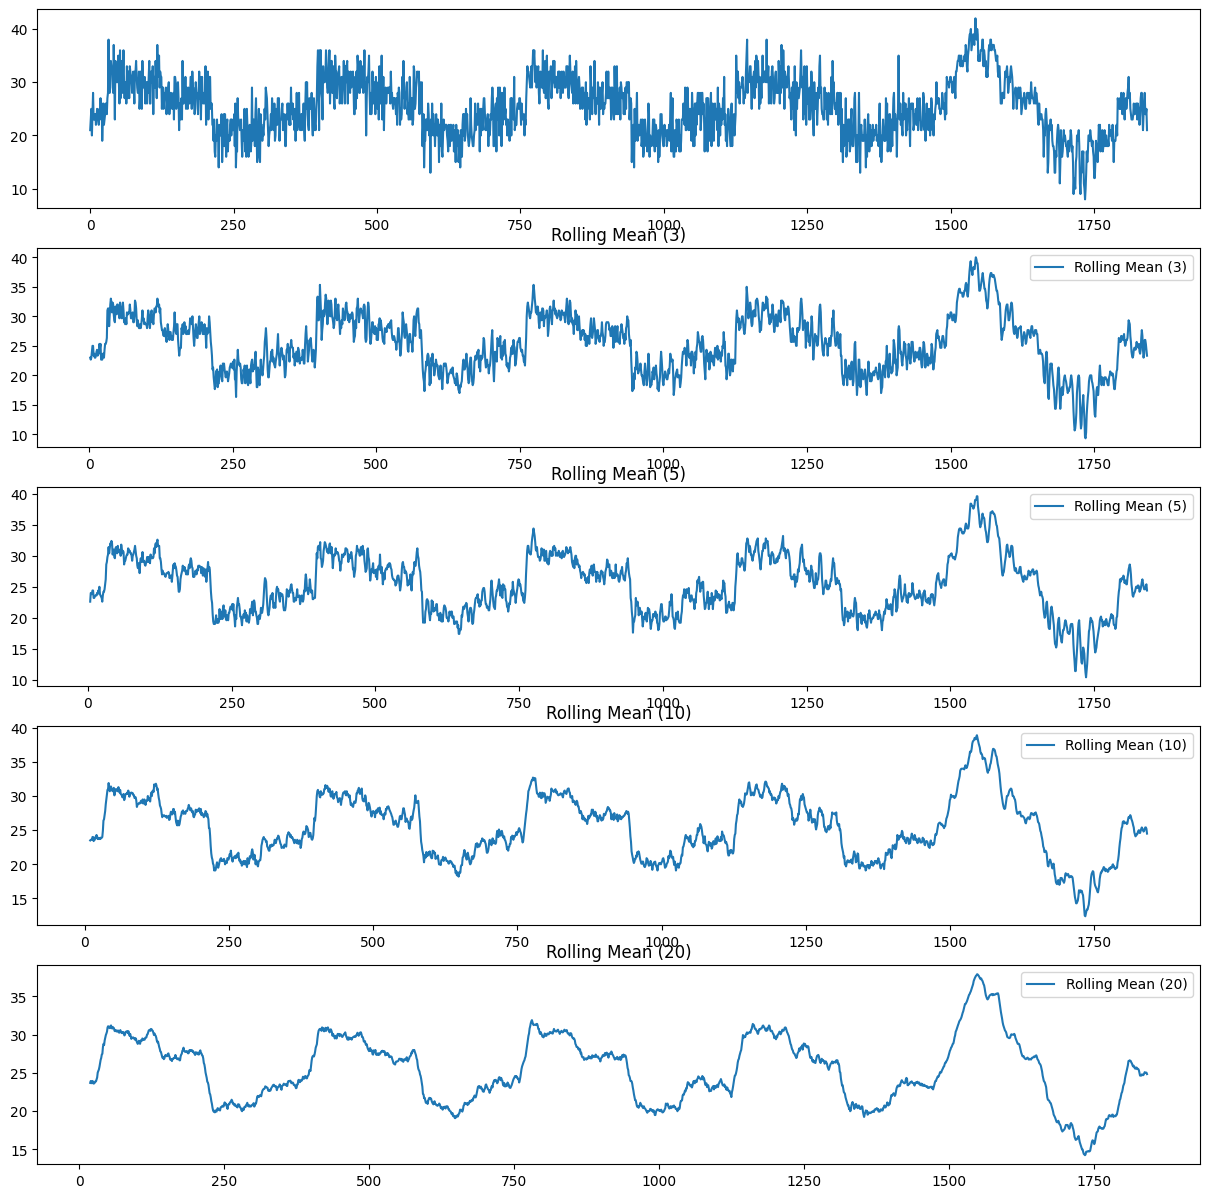

In [6]:
rolling_mean_3 = weather["Tagestemperatur"].rolling(window=3).mean()
rolling_mean_5 = weather["Tagestemperatur"].rolling(window=5).mean()
rolling_mean_10 = weather["Tagestemperatur"].rolling(window=10).mean()
rolling_mean_20 = weather["Tagestemperatur"].rolling(window=20).mean()

#plot subplot with different rolling means
fig, ax = plt.subplots(5, 1, figsize=(15, 15))

ax[0].plot(weather["Tagestemperatur"], label='Original')
ax[1].set_title('Original')
ax[1].legend()

ax[1].plot(rolling_mean_3, label='Rolling Mean (3)')
ax[1].set_title('Rolling Mean (3)')
ax[1].legend()

ax[2].plot(rolling_mean_5, label='Rolling Mean (5)')
ax[2].set_title('Rolling Mean (5)')
ax[2].legend()

ax[3].plot(rolling_mean_10, label='Rolling Mean (10)')
ax[3].set_title('Rolling Mean (10)')
ax[3].legend()

ax[4].plot(rolling_mean_20, label='Rolling Mean (20)')
ax[4].set_title('Rolling Mean (20)')
ax[4].legend()

plt.show()

Kreuzkorrelation auf rolling mean

In [7]:
def kreuzkorrelation(ganzeDaten, ausschnittDaten):
    cross_corr = np.correlate(ganzeDaten, ausschnittDaten, mode='valid')

    lags = np.arange(-len(y_daten) + 1, len(x_daten))
    
    # Plotten der Kreuzkorrelation
    plt.stem(cross_corr)
    plt.xlabel('Lag')
    plt.ylabel('Kreuzkorrelation')
    plt.title('Kreuzkorrelation zwischen Signal und Ausschnitt')
    max_corr_index = np.argmax(cross_corr)
    best_lag = lags[max_corr_index]
    plt.axvline(best_lag, color='r', linestyle='--')
    plt.show()
    
    # Den Lag mit der höchsten Kreuzkorrelation finden
    max_corr_index = np.argmax(cross_corr)
    best_lag = lags[max_corr_index]
    print("Der beste Lag ist:", best_lag)
    return best_lag

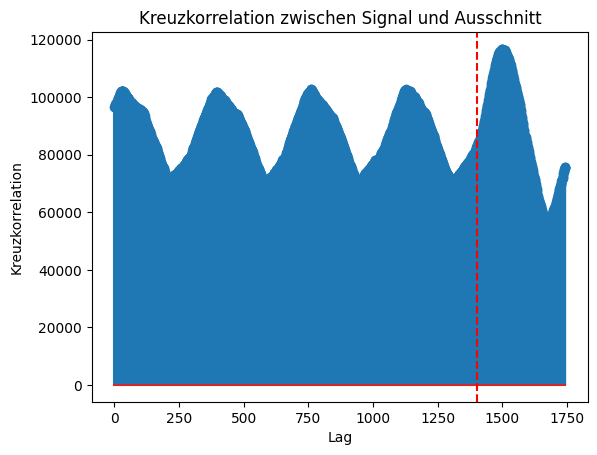

Der beste Lag ist: 1400


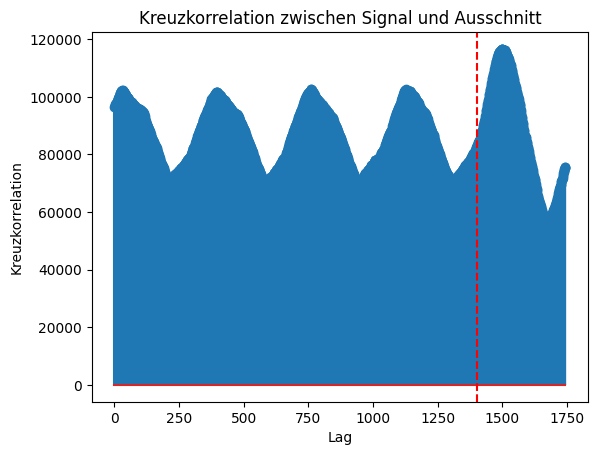

Der beste Lag ist: 1400


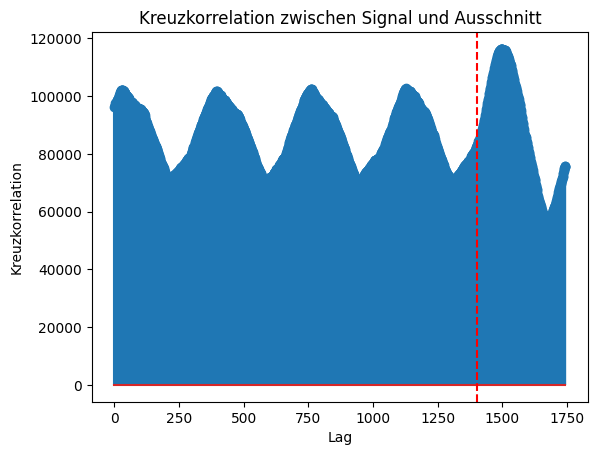

Der beste Lag ist: 1400


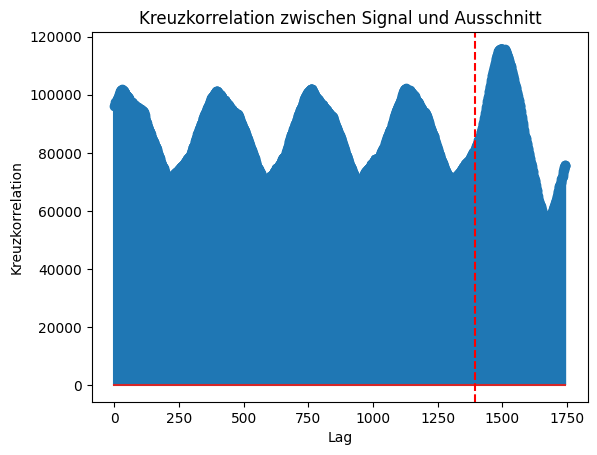

Der beste Lag ist: 1394


1394

In [8]:
ausschnittDaten3 = rolling_mean_3[1500:1600]
ausschnittDaten5 = rolling_mean_5[1500:1600]
ausschnittDaten10 = rolling_mean_10[1500:1600]
ausschnittDaten20 = rolling_mean_20[1500:1600]

#subplots with different rolling means

kreuzkorrelation(weather["Tagestemperatur"], ausschnittDaten3)
kreuzkorrelation(weather["Tagestemperatur"], ausschnittDaten5)
kreuzkorrelation(weather["Tagestemperatur"], ausschnittDaten10)
kreuzkorrelation(weather["Tagestemperatur"], ausschnittDaten20)

## 3.2 Segmentierung, morphologische Operationen und Objekteigenschaften in Bildern

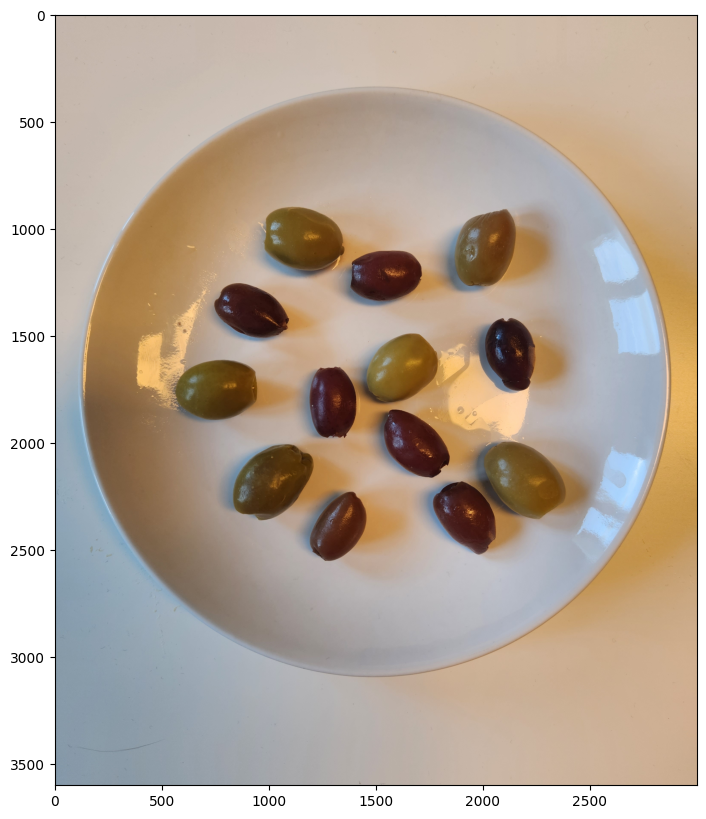

In [492]:
img = cv.imread('Fotos_Oliven/20240530_063042.jpg')


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.gcf().set_size_inches(10, 10)
plt.show()

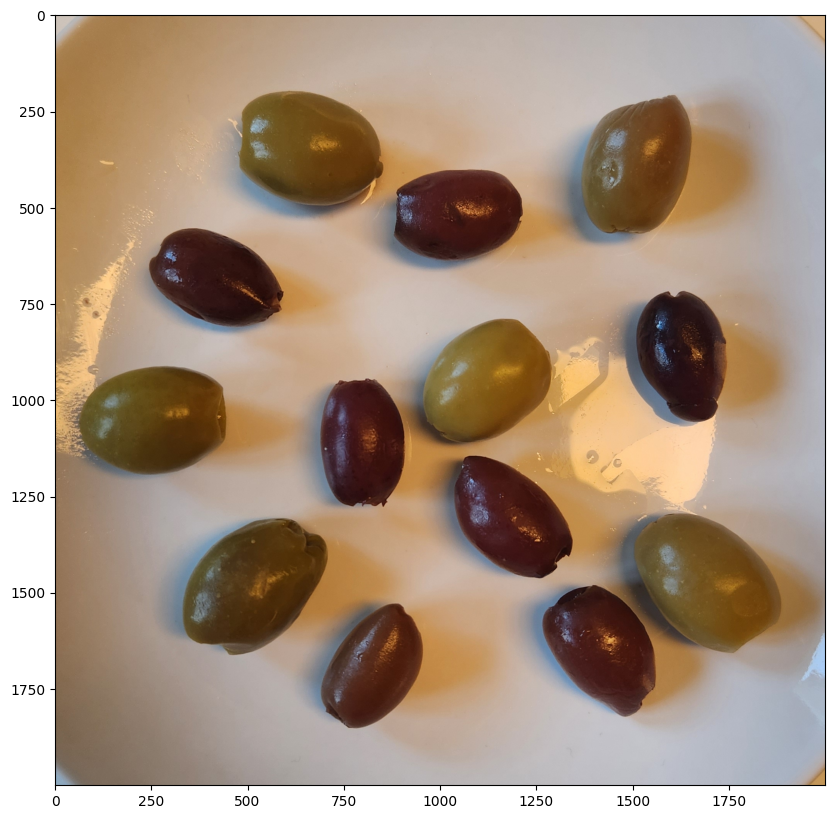

In [493]:
cut_img = img[700:2700, 500:2500]

plt.imshow(cv.cvtColor(cut_img, cv.COLOR_BGR2RGB))
plt.gcf().set_size_inches(10, 10)
plt.show()

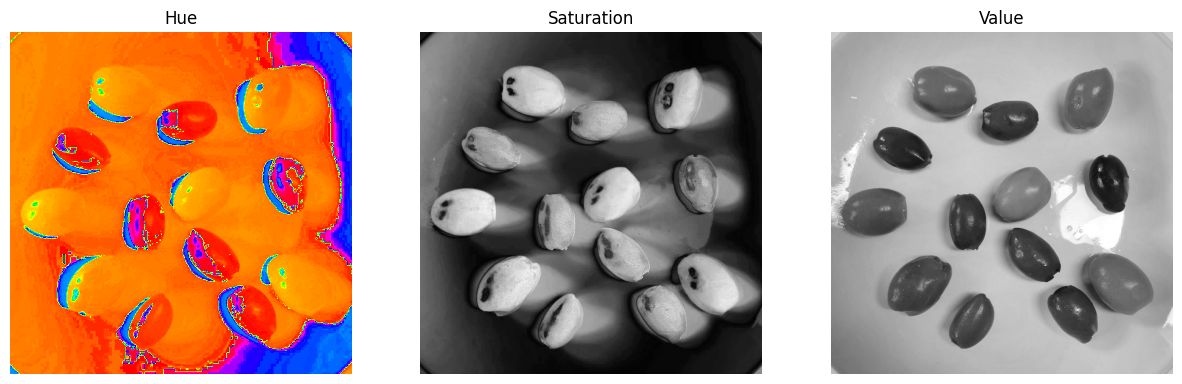

In [494]:
# Convert to hsv
hsv = cv.cvtColor(cut_img, cv.COLOR_BGR2HSV)

# plot
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(hsv[:, :, 0], cmap='hsv')
ax[0].set_title('Hue')
ax[0].axis('off')

ax[1].imshow(hsv[:, :, 1], cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')

ax[2].imshow(hsv[:, :, 2], cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off')

plt.show()

Text(0.5, 1.0, 'Threshold: [ 97 156]')

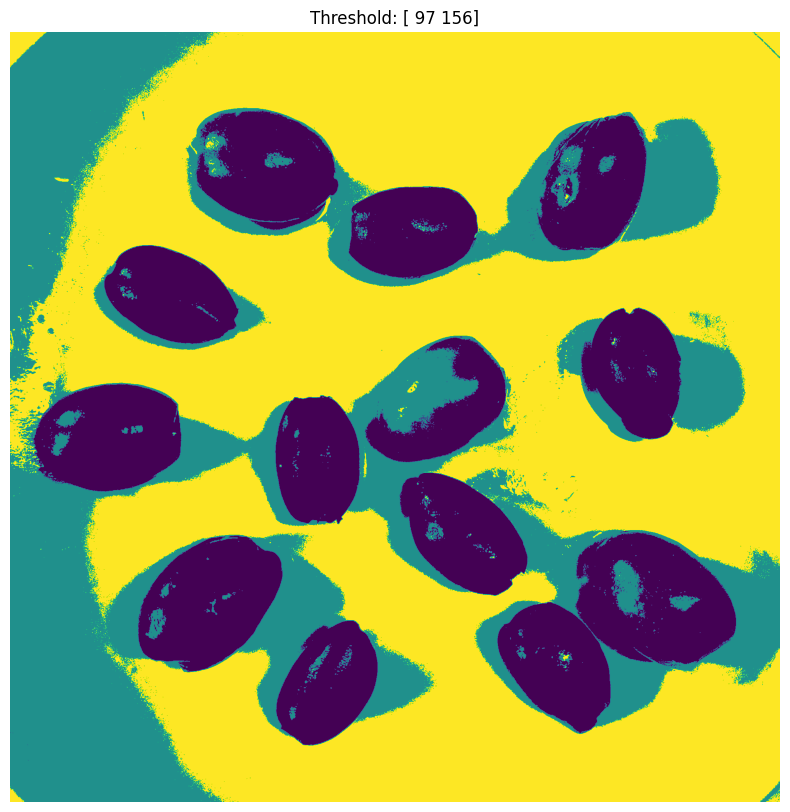

In [495]:
import skimage.filters as filters

img_gray = cv.cvtColor(cut_img, cv.COLOR_BGR2GRAY)

thresholds = filters.threshold_multiotsu(img_gray, classes=3)
regions = np.digitize(img_gray, bins=thresholds)



plt.imshow(regions)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.title(f'Threshold: {thresholds}')


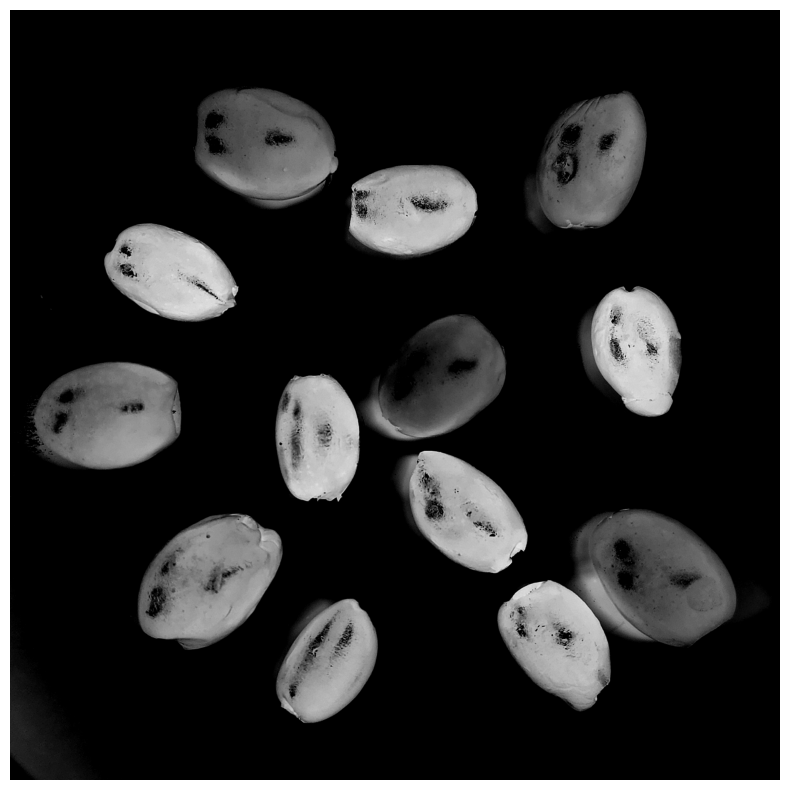

In [506]:
import numpy as np
from skimage import filters, measure, morphology
from skimage.segmentation import clear_border

img_gray = cv.cvtColor(cut_img, cv.COLOR_BGR2GRAY)

# Make the image brighter
img_gray = cv.add(img_gray, 135)

#convert the image to binary

# Invert the image
img_gray = cv.bitwise_not(img_gray)

plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

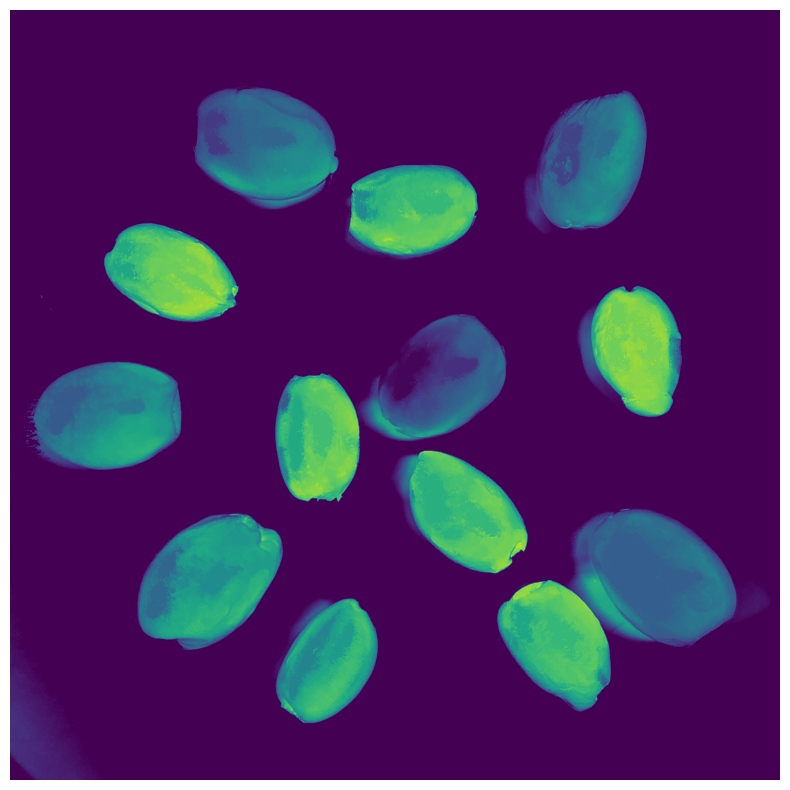

In [507]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(img_gray)
seed[1:-1, 1:-1] = img_gray.max()
mask = img_gray

filled = reconstruction(seed, mask, method='erosion')
#filled = img_gray

plt.imshow(filled)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

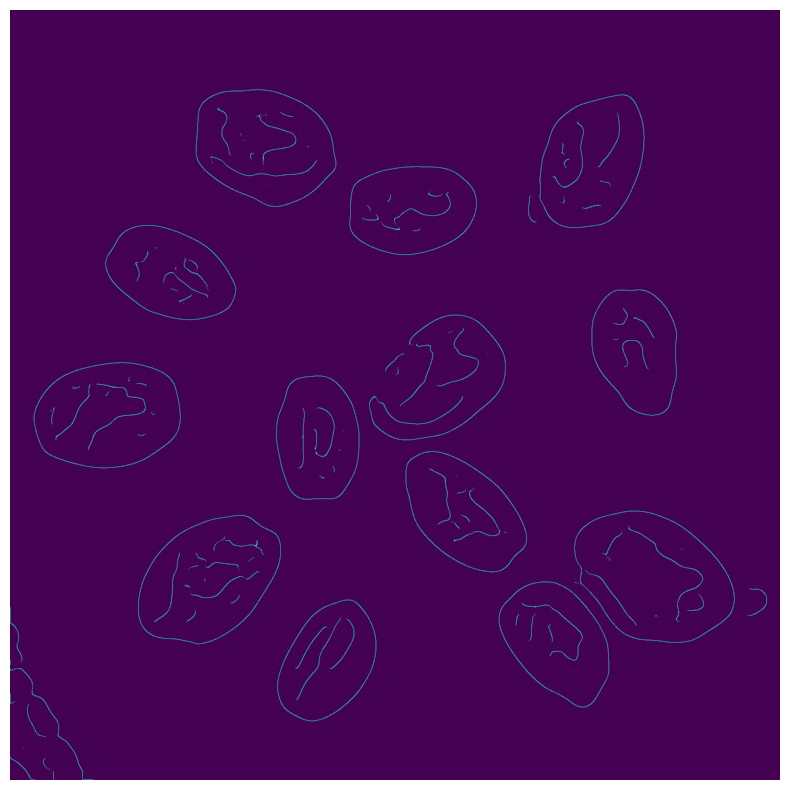

In [508]:
# canny edge detection
import skimage.feature as feature

edges = feature.canny(filled, sigma=16)


plt.imshow(edges)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()



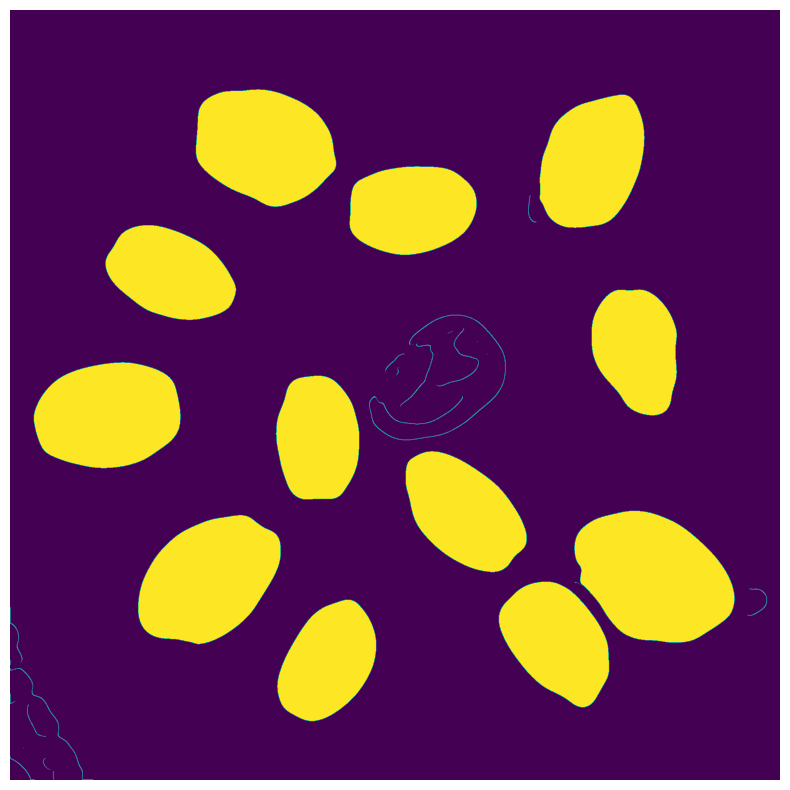

In [509]:
import scipy as sp
fill_olives = sp.ndimage.binary_fill_holes(edges)

plt.imshow(fill_olives)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

Text(0.5, 1.0, 'Threshold: [20.79492188 60.09960938]')

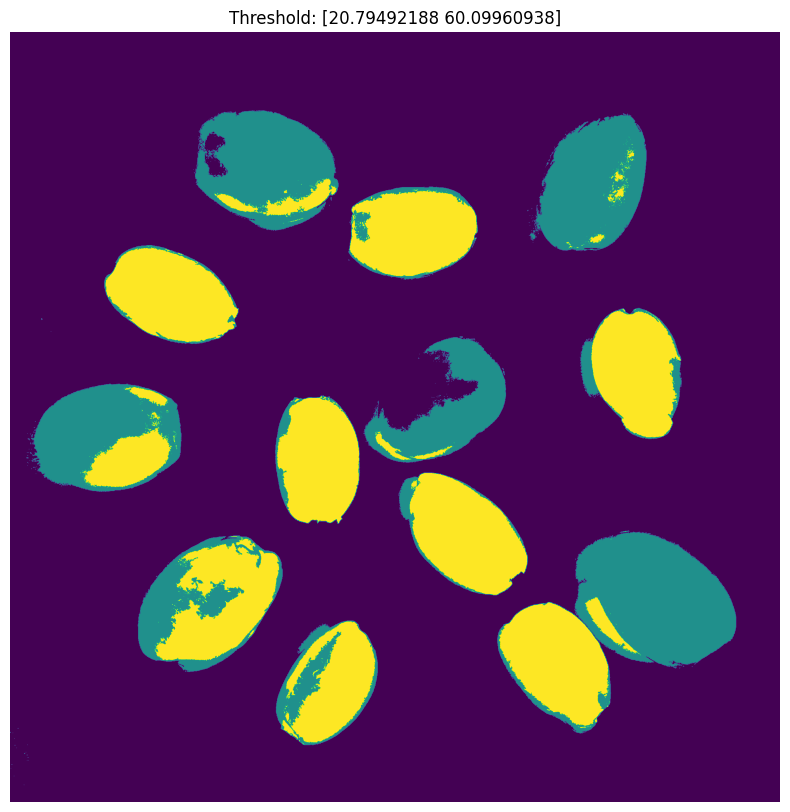

In [510]:
#treshhold = filters.threshold_otsu(img_gray)
#binary_mask = img_gray > treshhold
import skimage.segmentation as segmentation

combination = fill_olives + (filled*100)

thresholds = filters.threshold_multiotsu(filled, classes=3)
regions = np.digitize(filled, bins=thresholds)

#water_shed = segmentation.watershed(edges, mask=regions)


plt.imshow(regions)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.title(f'Threshold: {thresholds}')

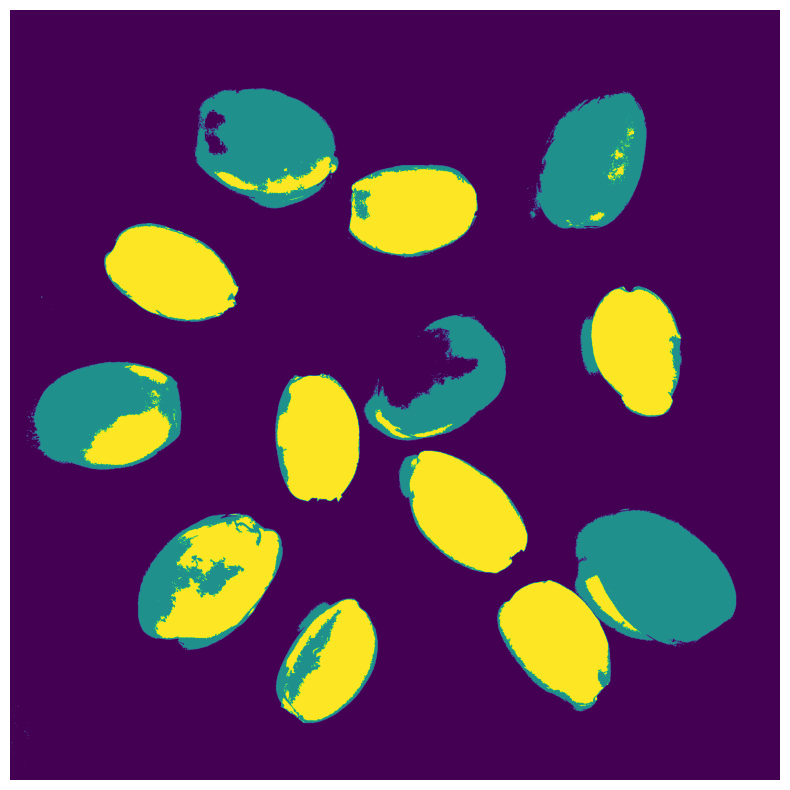

In [511]:
cleaned_mask = clear_border(regions)

plt.imshow(cleaned_mask)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

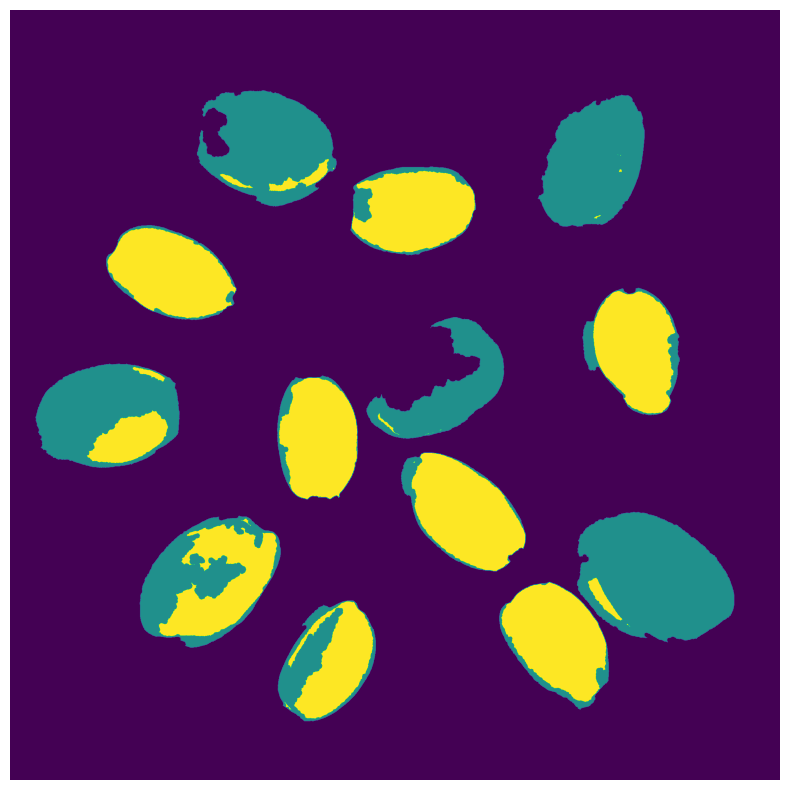

In [512]:
eroded_mask = morphology.erosion(cleaned_mask, morphology.disk(5))

plt.imshow(eroded_mask)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

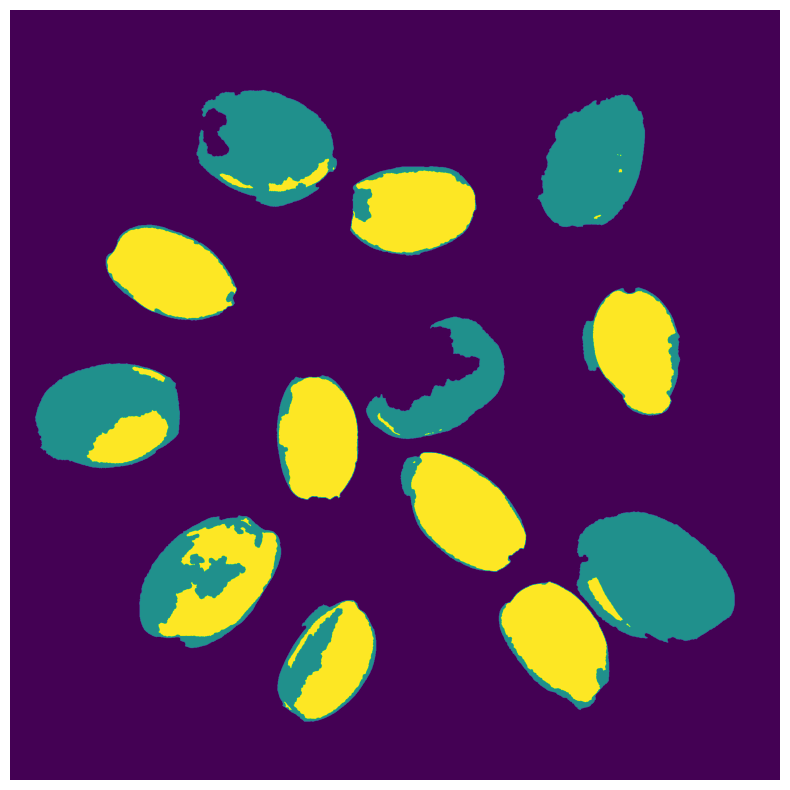

In [513]:
dilated_mask = morphology.dilation(eroded_mask, morphology.disk(1))

plt.imshow(dilated_mask)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

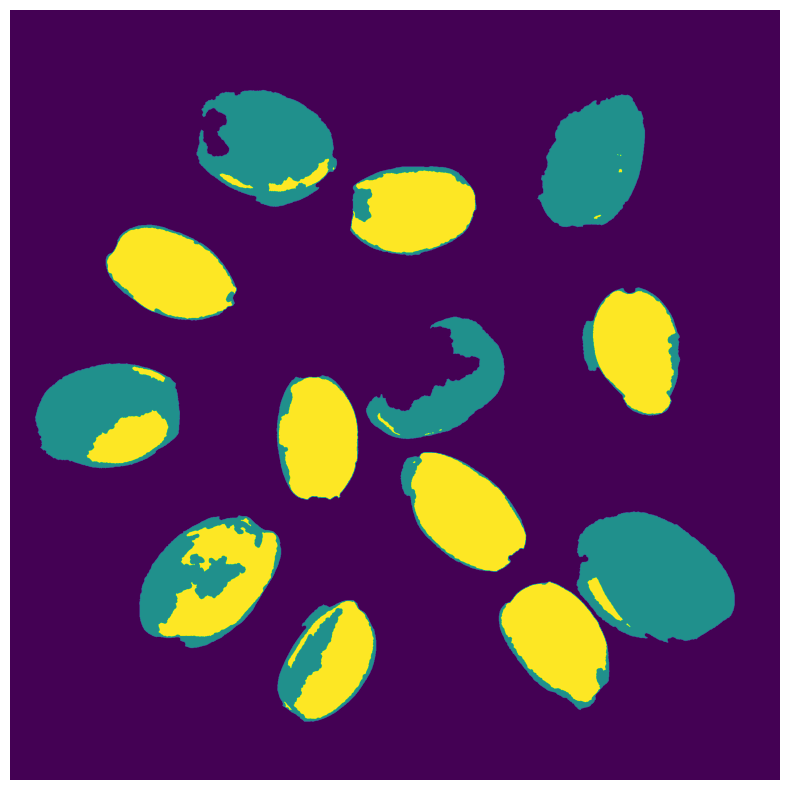

In [514]:
closed_mask = morphology.closing(dilated_mask, morphology.disk(1))

plt.imshow(closed_mask)
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

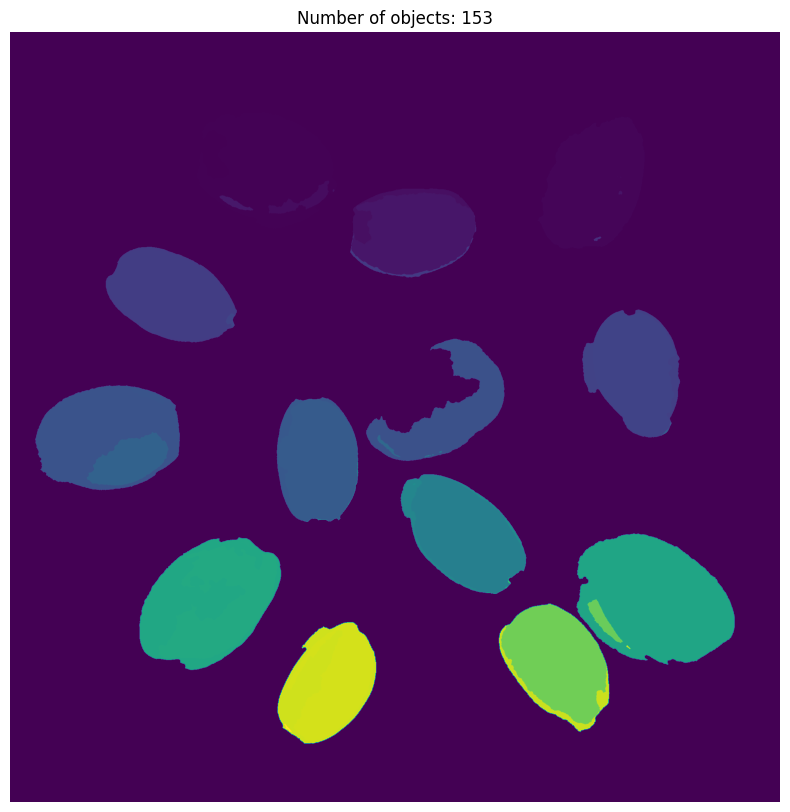

In [515]:
# Gelabelte Bild erzeugen
label_image, n_labels = measure.label(closed_mask, return_num=True, connectivity=2)

plt.imshow(label_image)
plt.axis('off')
plt.title(f'Number of objects: {n_labels}')
plt.gcf().set_size_inches(10, 10)
plt.show()

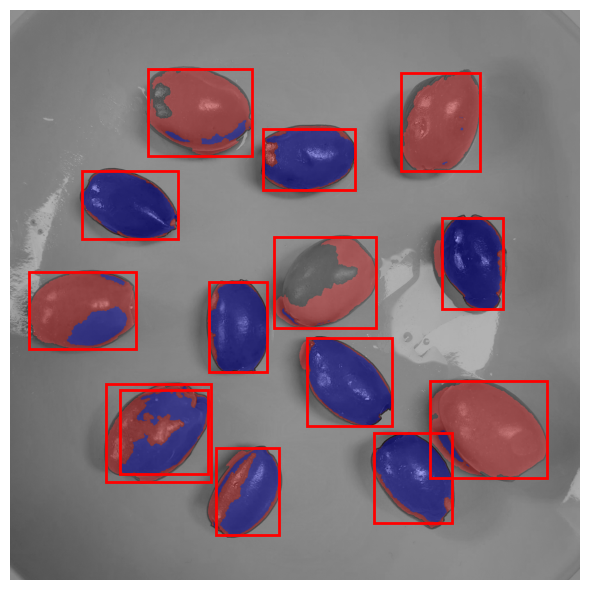

In [516]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.measure import label, regionprops
from skimage.color import label2rgb

image_label_overlay = label2rgb(closed_mask, image=cut_img, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 30000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle(
            (minc, minr),
            maxc - minc,
            maxr - minr,
            fill=False,
            edgecolor='red',
            linewidth=2,
        )
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

Label: 1, Area: 62068.0, Perimeter: 1337.3981951089456
Label: 2, Area: 52524.0, Perimeter: 1452.0794359760775
Label: 6, Area: 61758.0, Perimeter: 984.2051942088829
Label: 9, Area: 1045.0, Perimeter: 342.0487732352791
Label: 10, Area: 60473.0, Perimeter: 992.129075763134
Label: 11, Area: 58238.0, Perimeter: 1022.4549775709386
Label: 15, Area: 22687.0, Perimeter: 1274.444876303172
Label: 17, Area: 71016.0, Perimeter: 1724.4764055957476
Label: 19, Area: 57399.0, Perimeter: 966.749350086167
Label: 20, Area: 65787.0, Perimeter: 1075.3250352560271
Label: 21, Area: 90478.0, Perimeter: 1656.466304327981
Label: 22, Area: 87116.0, Perimeter: 1317.6753236814714
Label: 24, Area: 63750.0, Perimeter: 1030.697618258058
Label: 25, Area: 55981.0, Perimeter: 944.7564927611035
Anzahl der Pixel des Skeletons: 8048


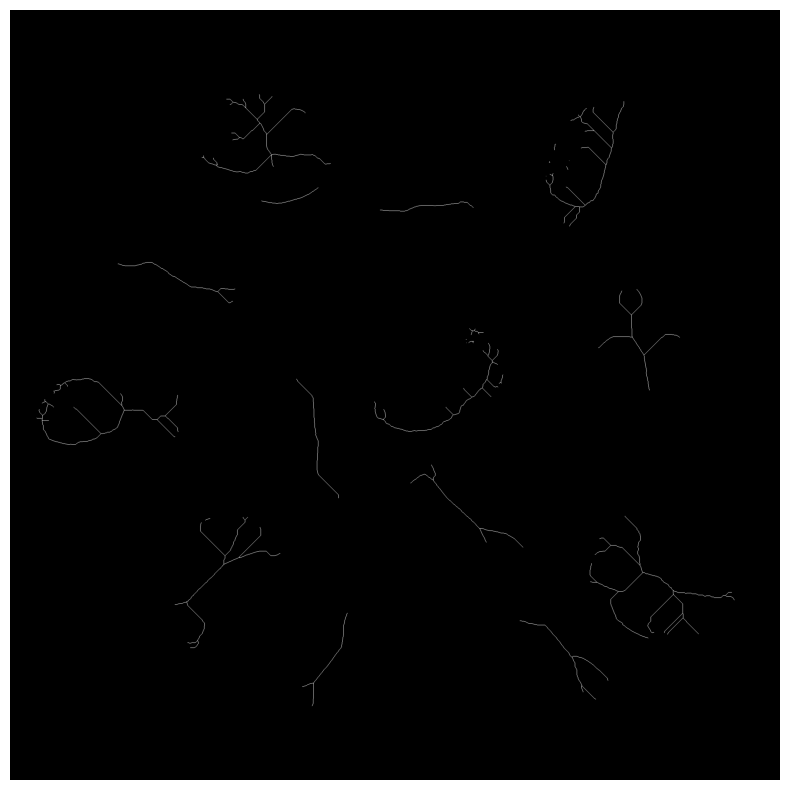

In [466]:
# Eigenschaften extrahieren
properties = measure.regionprops(label_image)

for prop in properties:
    if prop.area >= 1000:
        print(f'Label: {prop.label}, Area: {prop.area}, Perimeter: {prop.perimeter}')

# Skeletonisierung eines Objekts
skeleton = morphology.skeletonize(closed_mask)
skeleton_pixel_count = np.sum(skeleton)

# Ergebnisse diskutieren
print(f'Anzahl der Pixel des Skeletons: {skeleton_pixel_count}')

plt.imshow(skeleton, cmap='gray')
plt.axis('off')
plt.gcf().set_size_inches(10, 10)
plt.show()

# Keypoint Matching mit ORB

Ich verwende hier die PIL-Library zum Importieren der Bilder, da es mit OpenCV nicht funktioniert hat.

In [78]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images in list
images = []
path = 'Fotos_Löffel/'
# for file in os.listdir(path):
for img in os.listdir(path):
    img = Image.open(path + img)
    img_rgb = img.convert('RGB')
    images.append(np.array(img_rgb))
    

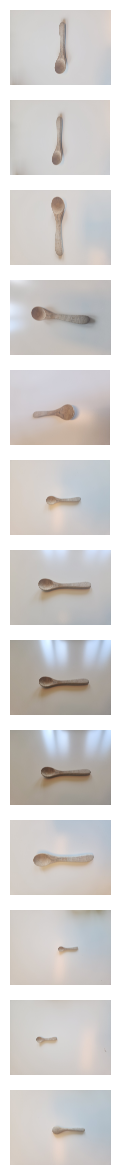

In [79]:
# plot all images
fig, ax = plt.subplots(len(images), 1, figsize=(15, 15))
for i, image in enumerate(images):
    ax[i].imshow(image)
    ax[i].axis('off')
plt.show()

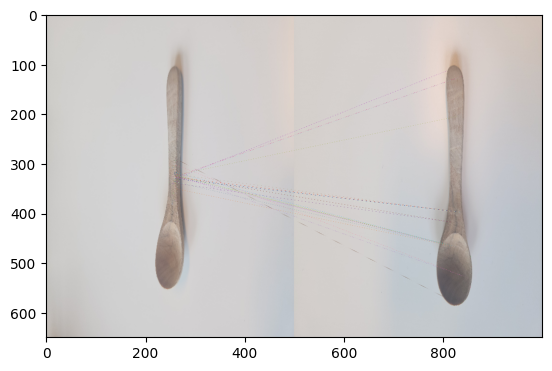

In [80]:
import os
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

query_img = Image.open('Fotos_Löffel/20240525_100413.jpg')
train_img = Image.open('train_img.jpg')

query_img = np.array(query_img.convert('RGB'))
train_img = np.array(train_img.convert('RGB'))

# Convert it to grayscale 
query_img_bw = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY) 
train_img_bw = cv.cvtColor(train_img, cv.COLOR_BGR2GRAY) 
   
# Initialize the ORB detector algorithm 
orb = cv.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv.resize(final_img, (1000,650)) 
  
# Show the final image 
plt.imshow(final_img)
plt.show()

Quelle: https://www.geeksforgeeks.org/feature-matching-using-orb-algorithm-in-python-opencv/

## Schritt für Schritt Erklärung

Der erste Schritt ist, die Bilder zu importieren und in Graustufenbilder umzuwandeln. Man benötigt zwei Bilder einmal das Query-Bild und das Trainingsbild. Das Query-Bild muss dann im Trainingsbild gefunden werden. In meinem Fall nehme ich das Bild direkt von Oben als Trainingsbild und möchte das Bild von der Seite als Query-Bild finden.

In [81]:
from PIL import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

query_img = Image.open('Fotos_Löffel/20240525_100413.jpg')
train_img = Image.open('train_img.jpg')

query_img = np.array(query_img.convert('RGB'))
train_img = np.array(train_img.convert('RGB'))

# Convert it to grayscale 
query_img_bw = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY) 
train_img_bw = cv.cvtColor(train_img, cv.COLOR_BGR2GRAY)

In [82]:
orb = cv.ORB_create()
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

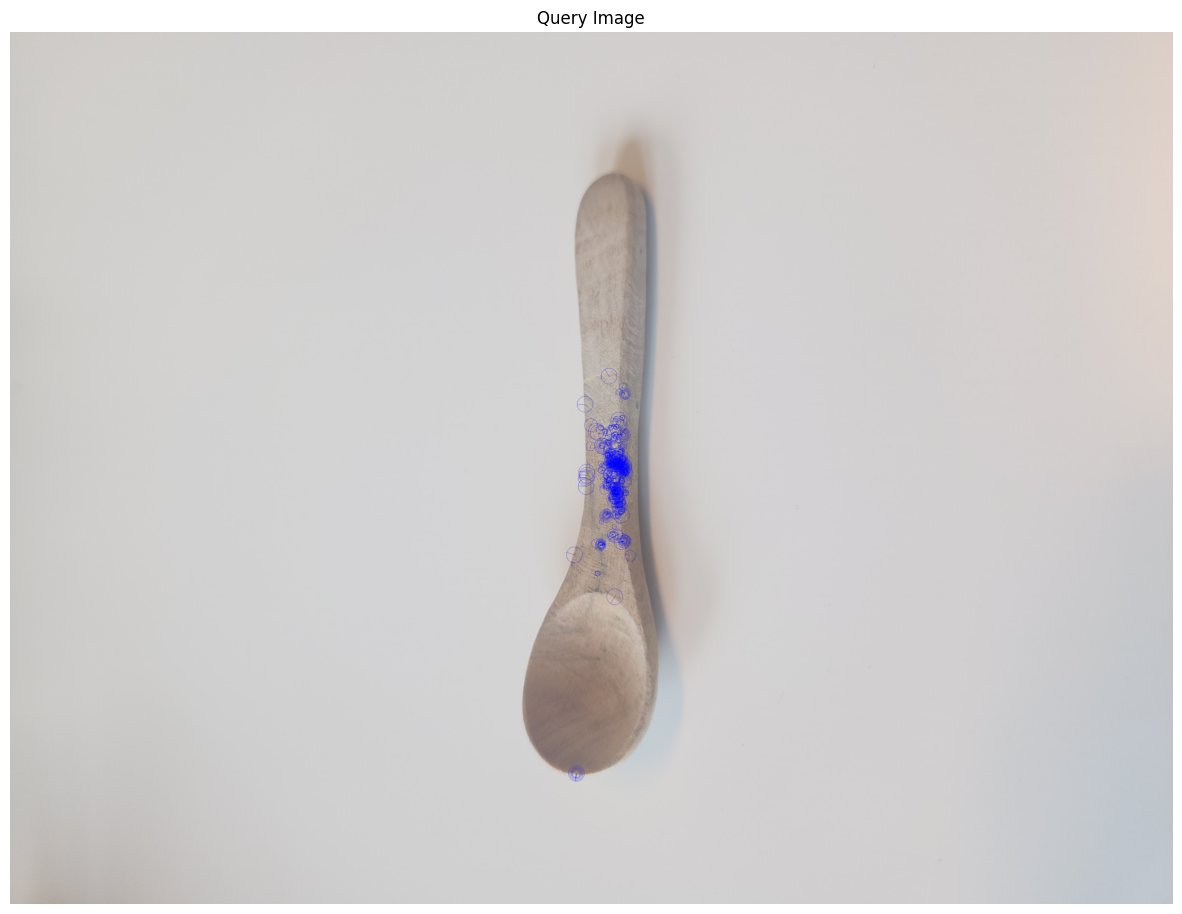

In [83]:
# show keypoints in query image
img_keypoints = cv.drawKeypoints(query_img, queryKeypoints, 0, (0, 0, 255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15,15))
plt.imshow(img_keypoints)
plt.title('Query Image')
plt.axis('off')
plt.show()

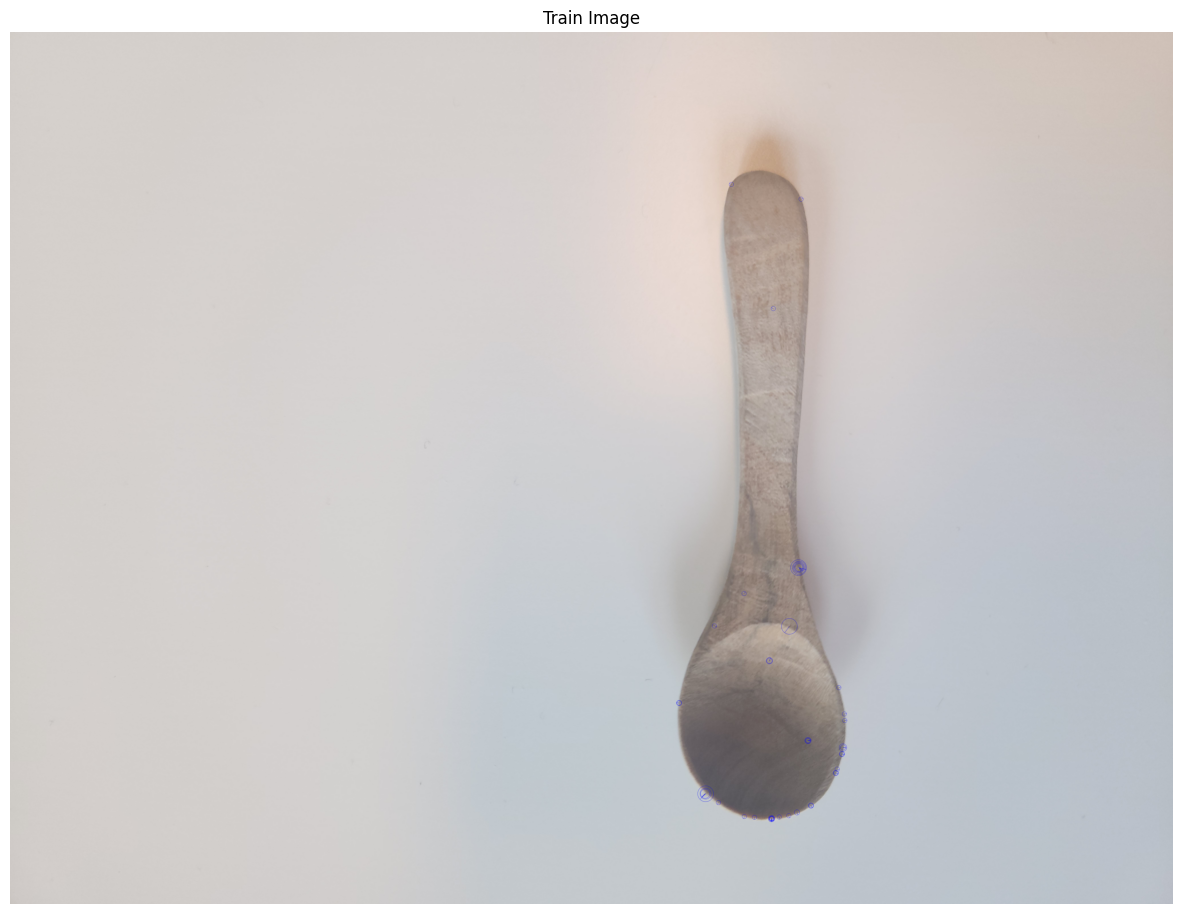

In [84]:
# show keypoints in train image
img_keypoints = cv.drawKeypoints(train_img, trainKeypoints, 0, (0, 0, 255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(15,15))
plt.imshow(img_keypoints)
plt.title('Train Image')
plt.axis('off')
plt.show()

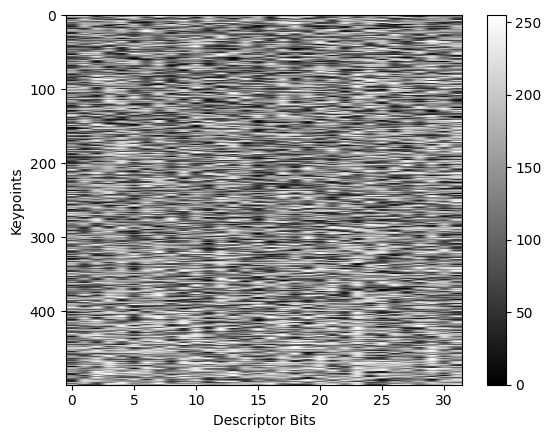

In [85]:
plt.imshow(queryDescriptors, cmap='gray', aspect='auto')
plt.xlabel('Descriptor Bits')
plt.ylabel('Keypoints')
plt.colorbar()
plt.show()

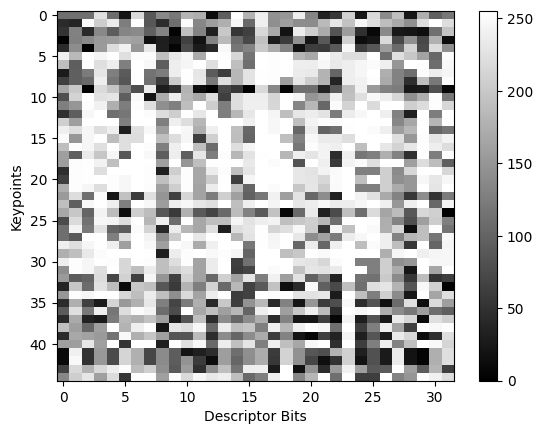

In [86]:
plt.imshow(trainDescriptors, cmap='gray', aspect='auto')
plt.xlabel('Descriptor Bits')
plt.ylabel('Keypoints')
plt.colorbar()
plt.show()

Matching der Keypoints

In [87]:
matcher = cv.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

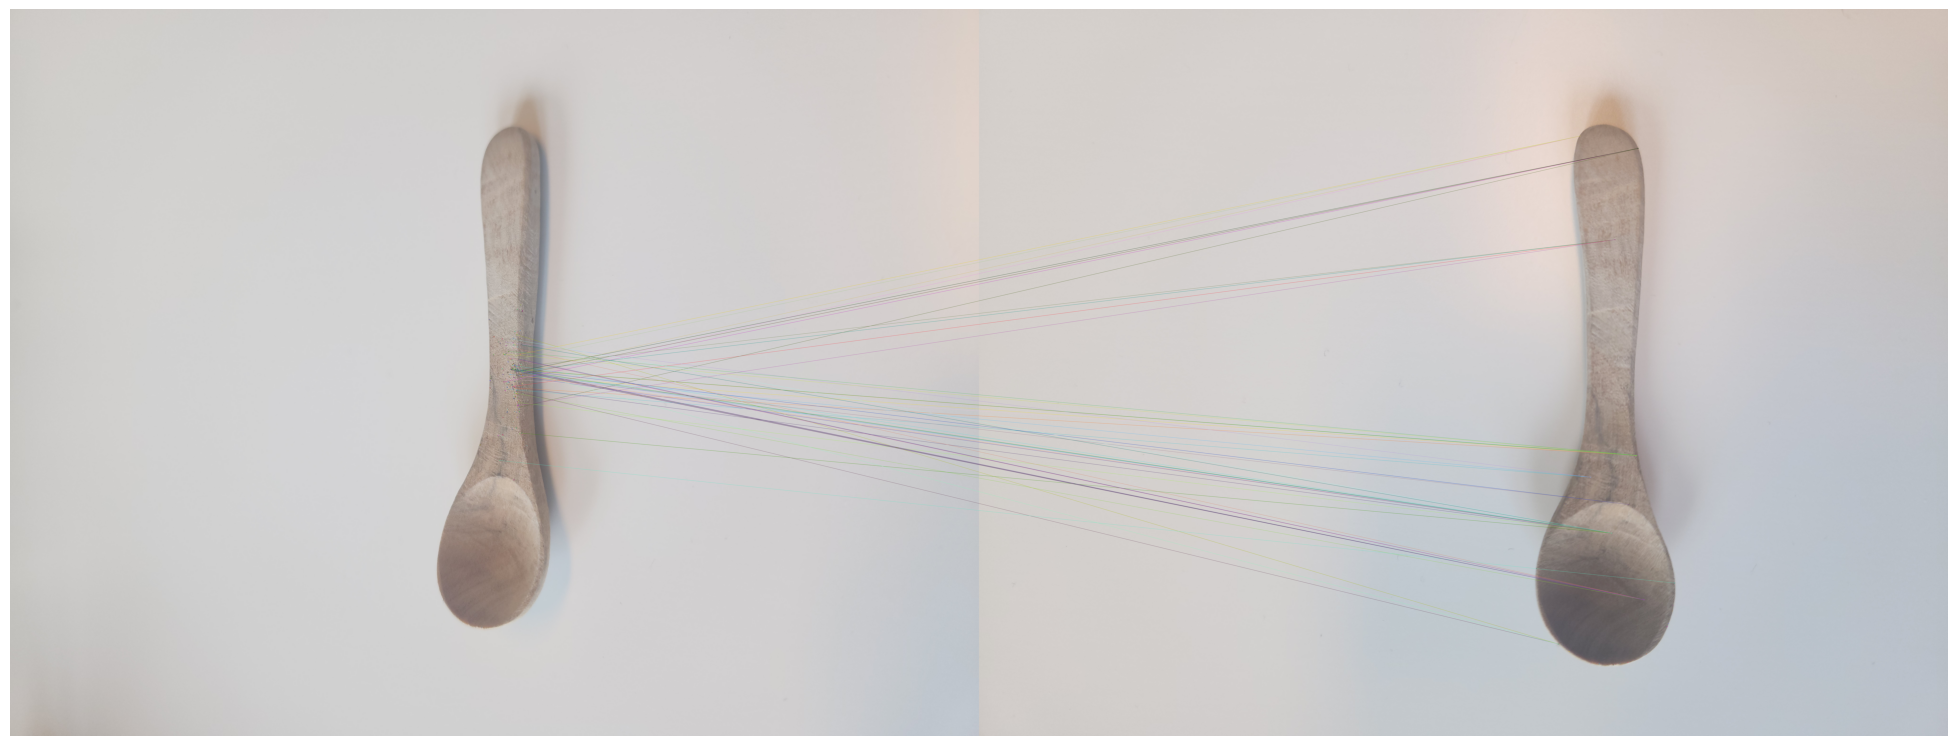

In [88]:
final_img = cv.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:50], None)
plt.figure(figsize=(25,15))
plt.imshow(final_img)
plt.axis('off')
plt.show()

In [89]:
def search_matches(query_img, train_img):
    query_img = np.array(query_img.convert('RGB'))
    train_img = np.array(train_img.convert('RGB'))
    
    query_img_bw = cv.cvtColor(query_img,cv.COLOR_BGR2GRAY)
    train_img_bw = cv.cvtColor(train_img, cv.COLOR_BGR2GRAY)

    orb = cv.ORB_create()
    queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
    trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

    matcher = cv.BFMatcher()
    matches = matcher.match(queryDescriptors,trainDescriptors)
    matches = sorted(matches, key = lambda x:x.distance)

    final_img = cv.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:20], None, matchColor=(0,0,0), flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return final_img

In [90]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load images in list
images = []
path = 'Fotos_Löffel/'
# for file in os.listdir(path):
for img in os.listdir(path):
    img = Image.open(path + img)
    images.append(img)

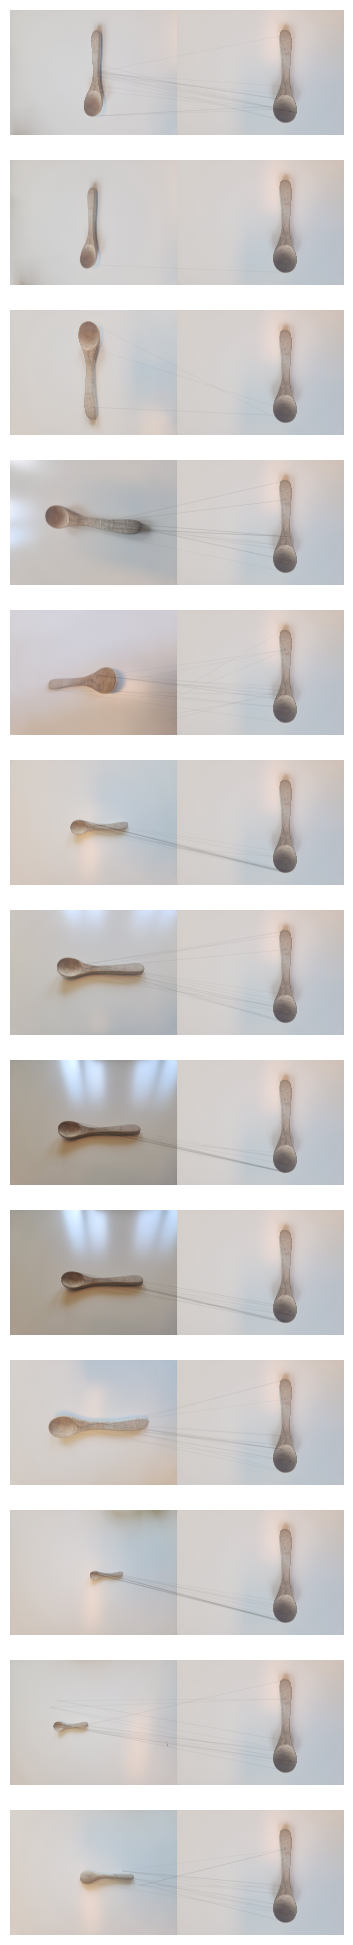

In [91]:
# plot all images with matches
train_img = Image.open('train_img.jpg')
fig, ax = plt.subplots(len(images), 1, figsize=(50, 25))
for i, image in enumerate(images):
    final_img = search_matches(image, train_img)
    ax[i].imshow(final_img)
    ax[i].axis('off')
plt.show()

Lichtverhältnisse anpassen

In [92]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance

# Load images in list
images = []
path = 'Fotos_Löffel/'
# for file in os.listdir(path):
for img in os.listdir(path):
    img = Image.open(path + img)
    # change the brightness of the image
    enhancer = ImageEnhance.Brightness(img)
    images.append(enhancer.enhance(1.5))

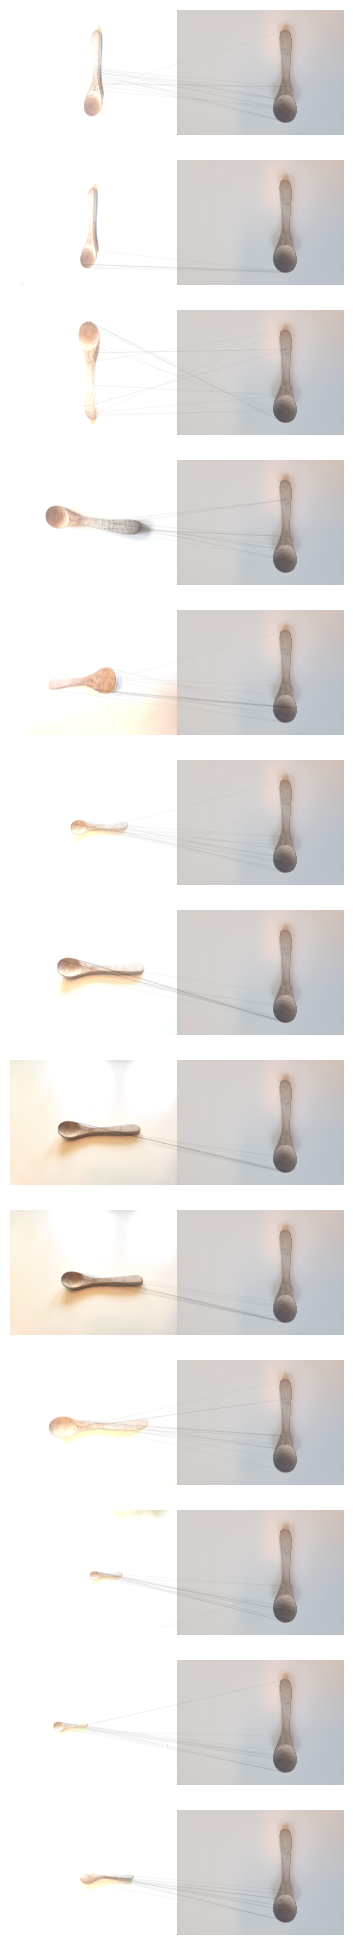

In [93]:
train_img = Image.open('train_img.jpg')
fig, ax = plt.subplots(len(images), 1, figsize=(50, 25))
for i, image in enumerate(images):
    final_img = search_matches(image, train_img)
    ax[i].imshow(final_img)
    ax[i].axis('off')
plt.show()

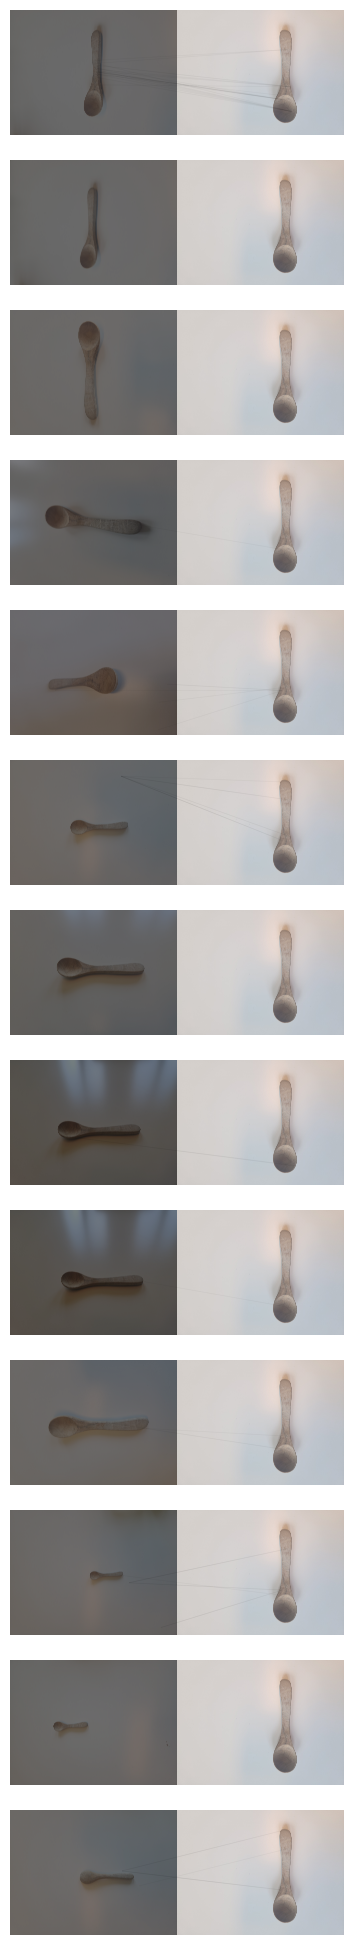

In [94]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance

# Load images in list
images = []
path = 'Fotos_Löffel/'
# for file in os.listdir(path):
for img in os.listdir(path):
    img = Image.open(path + img)
    # change the brightness of the image
    enhancer = ImageEnhance.Brightness(img)
    images.append(enhancer.enhance(0.5))
    
train_img = Image.open('train_img.jpg')
fig, ax = plt.subplots(len(images), 1, figsize=(25, 25))
for i, image in enumerate(images):
    final_img = search_matches(image, train_img)
    ax[i].imshow(final_img)
    ax[i].axis('off')
plt.show()

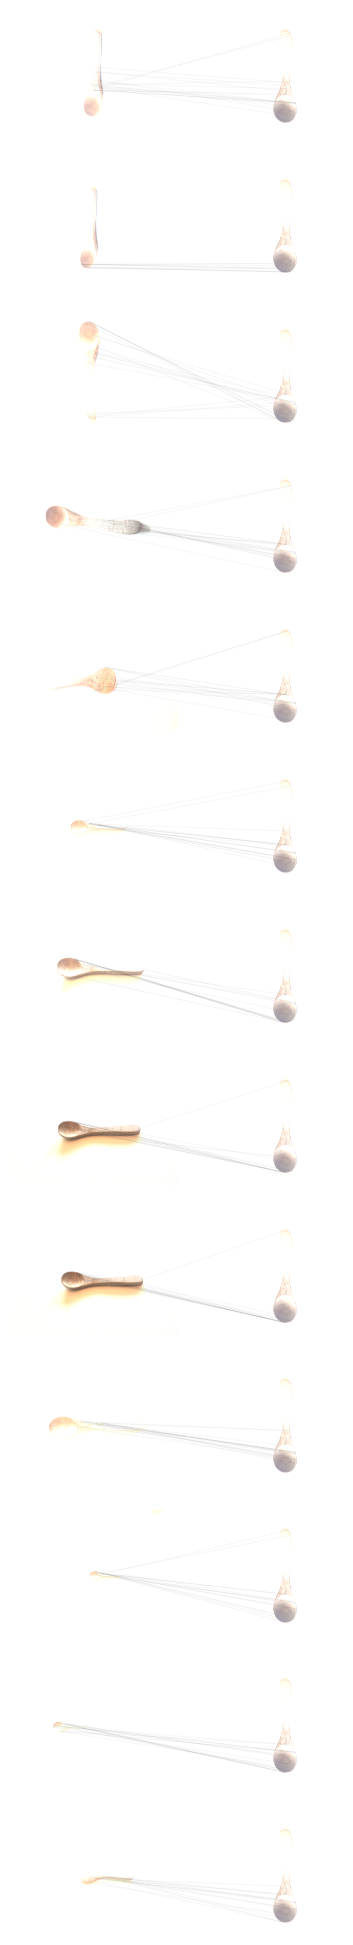

In [95]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageEnhance

# Load images in list
images = []
path = 'Fotos_Löffel/'
# for file in os.listdir(path):
for img in os.listdir(path):
    img = Image.open(path + img)
    # change the brightness of the image
    enhancer = ImageEnhance.Brightness(img)
    images.append(enhancer.enhance(1.8))
    
enhancer = ImageEnhance.Brightness(Image.open('train_img.jpg'))
train_img = enhancer.enhance(1.8)
fig, ax = plt.subplots(len(images), 1, figsize=(25, 25))
for i, image in enumerate(images):
    final_img = search_matches(image, train_img)
    ax[i].imshow(final_img)
    ax[i].axis('off')
plt.show()